# Low dimensional representation

## ProDOT system

Original paper: [Ioan2021](https://pubs.acs.org/doi/abs/10.1021/acs.macromol.0c02132)

In [1]:
import numpy as np
import time
import os, sys

In [2]:
sys.path.append('../../')

In [3]:
from src import myTools, plotTools

## System loading

In [4]:
sysdir_path = '../1.dscr_analysis/soap_rcut6_n8_l4/'
sysname = 'soap_n_Z1_Z3_Nframe5000.npy'

In [5]:
X = np.load(sysdir_path+sysname)
X.shape

(5000, 4101)

## Representations

In [6]:
import matplotlib.pyplot as plt

### Soap spectra

Text(0.5, 0, 'N$_{features}$')

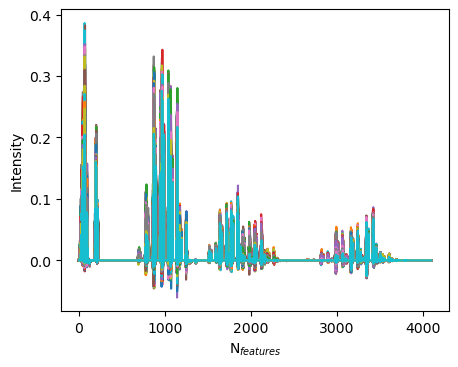

In [7]:
fig, ax = plotTools.get_axes(1,1,res=100)
for s in X[:500]:
    ax.plot(s)
ax.set_ylabel(r'Intensity')
ax.set_xlabel(r'N$_{features}$')

### Linear PCA

In [8]:
from sklearn.decomposition import PCA

In [11]:
N = 9
lpca = PCA(n_components=N)
X_lpca = lpca.fit_transform(X)

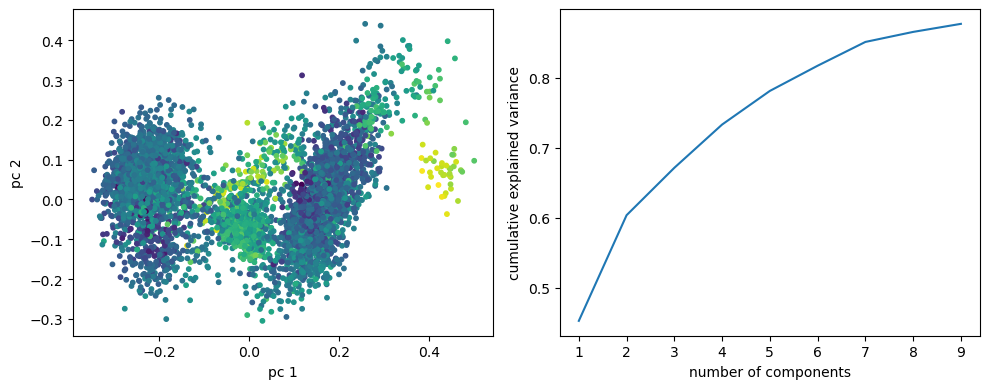

In [12]:
fig, ax = plotTools.get_axes(2,2,res=100)

ax[0].scatter(X_lpca[:,0], X_lpca[:,1],
              c=X_lpca[:,2], s=10)
ax[0].set_ylabel('pc 2')
ax[0].set_xlabel('pc 1')

ax[1].plot(np.arange(1,N+1),np.cumsum(lpca.explained_variance_ratio_))
ax[1].set_xlabel('number of components')
ax[1].set_ylabel('cumulative explained variance')

fig.tight_layout()

In [13]:
np.save(f'lpca{N}_n_Z1_Z3_Nframe5000', X_lpca)

In [14]:
!ls

clustering.ipynb			   low_dim_representation.ipynb
hdbscan_vs_ioan_1000pt.png		   lpca9_n_Z1_Z3_Nframe5000.npy
hdbscan_vs_ioan_1000pt_prmtr_search_0.png  lpca_n_Z1_Z3_Nframe1000.npy
hdbscan_vs_ioan_5000pt.png		   lpca_n_Z1_Z3_Nframe5000.npy
hdbscan_vs_ioan_5000pt_prmtr_search_0.png  umap_n_Z1_Z3_Nframe5000.npy


### $k$-PCA

In [15]:
from sklearn.decomposition import KernelPCA

In [16]:
N = 9
pca_kernel = {
    'rbf' : KernelPCA(n_components=N, kernel='rbf'),
    'cosine' : KernelPCA(n_components=N, kernel='cosine')
}

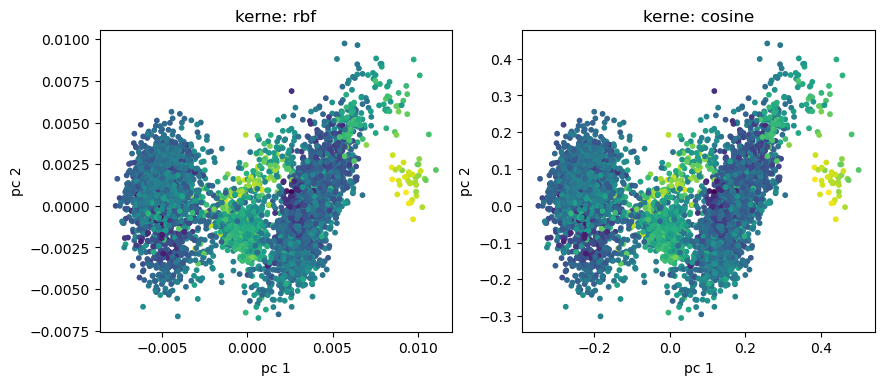

In [17]:
fig, ax = plotTools.get_axes(2,2,res=100)

for i,(k,pc) in enumerate(pca_kernel.items()):
    X_kpca_tmp = pc.fit_transform(X)
    ax[i].scatter(X_kpca_tmp[:,0], X_kpca_tmp[:,1],
                  c=X_kpca_tmp[:,2], s=10)
    ax[i].set_title(f'kerne: {k}')
    ax[i].set_ylabel('pc 2')
    ax[i].set_xlabel('pc 1')

### Umap

In [18]:
import umap, umap.plot

In [19]:
og_labels = np.loadtxt('../0.data/ProDOT-2Hex-00PC-cryst.labels').astype(int)
og_labels

array([1, 1, 1, ..., 3, 3, 3])

In [20]:
reducer = umap.UMAP()

In [21]:
mapper = reducer.fit(X)

In [22]:
embedding = mapper.transform(X)
embedding.shape

(5000, 2)

<AxesSubplot:>

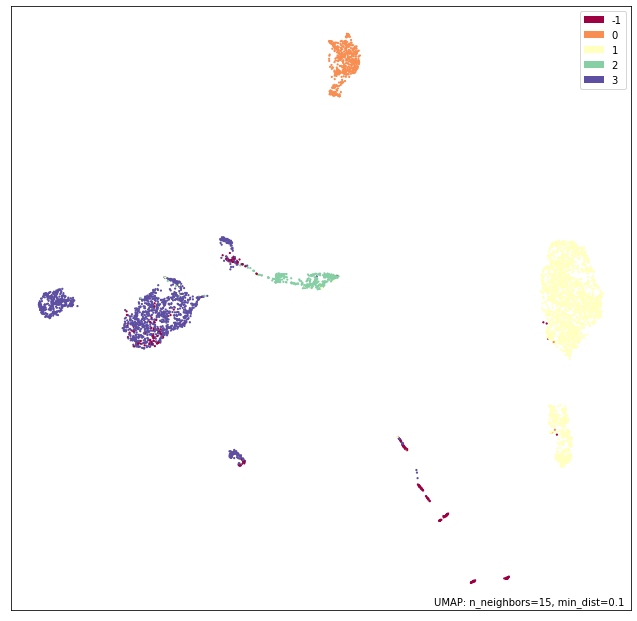

In [23]:
umap.plot.points(mapper, labels=og_labels)

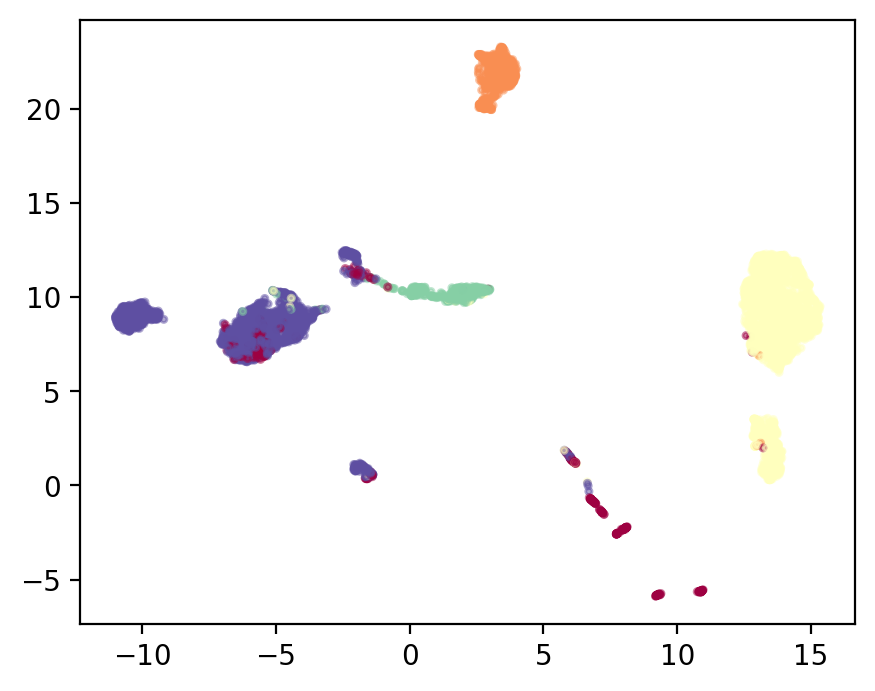

In [24]:
fig, ax = plotTools.get_axes(1,1,res=200)
ax.scatter(*embedding.T, s=5, alpha=0.5, 
           c=og_labels, cmap='Spectral')

In [25]:
np.save('umap_n_Z1_Z3_Nframe5000', embedding)

<AxesSubplot:>

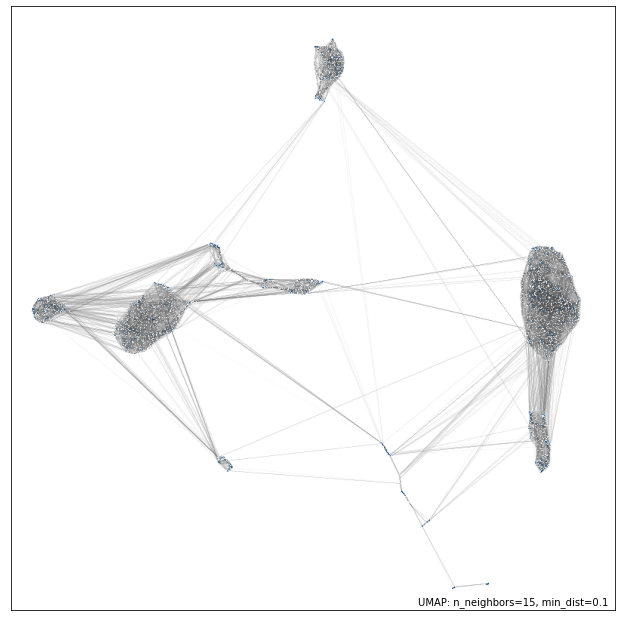

In [26]:
umap.plot.connectivity(mapper, show_points=True)